## check GPU availabilty

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ", len(physical_devices))
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Number of GPUs Available:  0


## Paths

In [ ]:
CUR_DIR = '/content/' #this may be different runnig local
MAT_DIR= CUR_DIR+'mat/'
TRAIN_MAT_PATH = MAT_DIR + 'train/train/'
TEST_MAT_PATH = MAT_DIR + 'test/test/'
VOICE_DIR = CUR_DIR+'voice/'
TRAIN_VOICE_PATH = VOICE_DIR+'train/train/'
TEST_VOICE_PATH = VOICE_DIR+'test/test/'
DRIVE_PATH = CUR_DIR+'drive/MyDrive/Bachelor_Project/'
DRIVE2_PATH = CUR_DIR+'drive/MyDrive/Bachelor_Project_Part2/'
DRIVE3_PATH = CUR_DIR+'drive/MyDrive/Bachelor_Project_Part3/'
#TRAIN_VOICE_OLD_PATH = CUR_DIR+'train/train/'
#TEST_VOICE_OLD_PATH = CUR_DIR+'test/test/'
#TRAIN_IMG_PATH = CUR_DIR+'train/train-img/'
#TEST_IMG_PATH = CUR_DIR+'test/test-img/'
TRAIN_MAT_PATH = MAT_DIR + 'train/'
TEST_MAT_PATH = MAT_DIR + 'test/'
MOZILLA_PATH= CUR_DIR+'mozilla/'
MOZILLA_VALID_TRAIN = CUR_DIR+'mozilla/cv-valid-train/'
MOZILLA_VALID_DEV = CUR_DIR+'mozilla/cv-valid-dev/'
MOZILLA_VALID_TEST = CUR_DIR+'mozilla/cv-valid-test/'

In [ ]:
! mkdir $MAT_DIR
! mkdir $VOICE_DIR
! mkdir $TRAIN_MAT_PATH
! mkdir $TEST_MAT_PATH

## mount google drive

In [ ]:
from google.colab import drive
drive.mount(CUR_DIR+'drive/', force_remount=True)
#%cd '{CUR_DIR}drive/MyDrive/Bachelor_Project/'
#%ls

Mounted at /content/drive/


## import libraries



In [ ]:
# low import
import numpy as np
import pandas as pd
import gc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from glob import glob
import librosa
import librosa.display
import soundfile as sf
import scipy.signal as signal
import gc
import shutil

## spoken-language-identification dataset


In [ ]:
! mkdir ~/.kaggle
! cp $DRIVE_PATH/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download toponowicz/spoken-language-identification

100% 14.9G/14.9G [02:49<00:00, 147MB/s]
100% 14.9G/14.9G [02:50<00:00, 94.2MB/s]


In [ ]:
%%capture
!unzip {CUR_DIR}spoken-language-identification.zip -d $VOICE_DIR

### create dataframe

In [ ]:
train_data_dir=np.array(glob(TRAIN_VOICE_PATH+"*"))
traindf = pd.DataFrame(train_data_dir,columns = ['file'])
format_len = len('flac')
traindf['ID']= traindf['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
traindf

,file,ID
0,/content/voice/train/train/de_f_9bd3b58fe6f75d...,de_f_9bd3b58fe6f75dc40e85021914b4b06a.fragment...
1,/content/voice/train/train/es_f_bf4285930fa46f...,es_f_bf4285930fa46f2052e5bdbc37a8a4df.fragment...
2,/content/voice/train/train/es_f_68e1dcf1b41edc...,es_f_68e1dcf1b41edcfa24b402f46ec2a65e.fragment...
3,/content/voice/train/train/de_m_2cfa348b2b6852...,de_m_2cfa348b2b6852e38637a4225158678d.fragment...
4,/content/voice/train/train/es_m_406bb0dc71a220...,es_m_406bb0dc71a22051d900bc55cdfad59e.fragment...
...,...,...
73075,/content/voice/train/train/es_m_d5b91a4ffb1ead...,es_m_d5b91a4ffb1ead826b7968ec19cbfa1c.fragment...
73076,/content/voice/train/train/en_m_3a8f30bef6d7b6...,en_m_3a8f30bef6d7b6a1332629491eabcbf0.fragment...
73077,/content/voice/train/train/es_f_e27d922d06d483...,es_f_e27d922d06d483e4df1305235a6cd87b.fragment...
73078,/content/voice/train/train/es_m_d7128fe46e362a...,es_m_d7128fe46e362acdb2271a154e3206ae.fragment...


In [ ]:
test_data_dir=np.array(glob(TEST_VOICE_PATH+"*"))
testdf = pd.DataFrame(test_data_dir,columns = ['file'])
format_len = len('flac')
testdf['ID']= testdf['file'].apply(lambda x: x.split('/')[-1][:-format_len]+'npy')
testdf

,file,ID
0,/content/voice/test/test/es_m_08111ce8d6a7ebc6...,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...
1,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...
2,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...
3,/content/voice/test/test/es_m_08111ce8d6a7ebc6...,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...
4,/content/voice/test/test/es_f_50298ab71aaba850...,es_f_50298ab71aaba8508ebeef49d853df11.fragment...
...,...,...
535,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...
536,/content/voice/test/test/de_f_63f5b79c76cf5a1a...,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...
537,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...
538,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...


In [ ]:
traindf['lang'] = traindf['ID'].apply(lambda x: x.split('_')[0])
testdf['lang'] = testdf['ID'].apply(lambda x: x.split('_')[0])

### generate spectrogram

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, n_mels=40, hop_length=512)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(S.shape, SP.shape, sample_rate)
    librosa.display.specshow(SP)

(40, 431) (40, 431) 22050


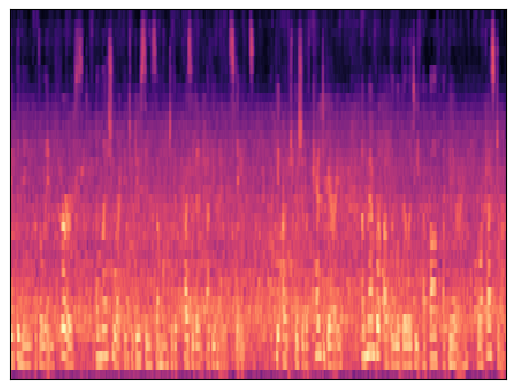

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[0], TRAIN_MAT_PATH)

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, n_mels=40, hop_length=256)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(S.shape, SP.shape, sample_rate)
    librosa.display.specshow(SP)

(40, 862) (40, 862) 22050


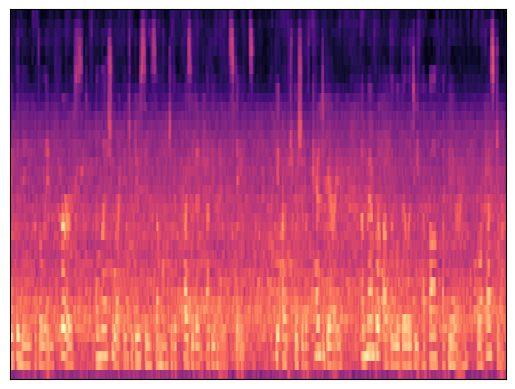

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[0], TRAIN_MAT_PATH)

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, hop_length=256)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(S.shape, SP.shape, sample_rate)
    librosa.display.specshow(SP)

(128, 862) (128, 862) 22050


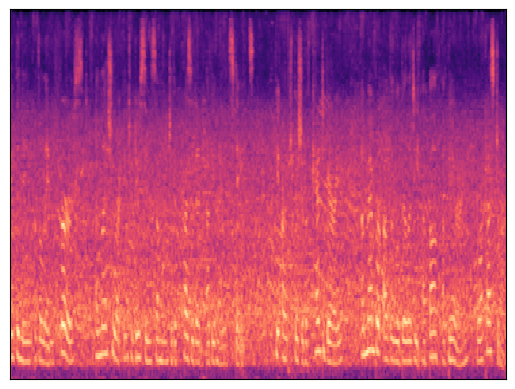

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[0], TRAIN_MAT_PATH)

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, n_mels=40)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(S.shape, SP.shape, sample_rate)
    librosa.display.specshow(SP)

(40, 431) (40, 431) 22050


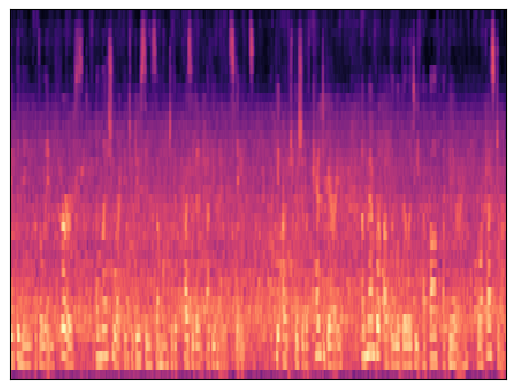

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[0], TRAIN_MAT_PATH)

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(S.shape, SP.shape, sample_rate)
    librosa.display.specshow(SP)

(128, 431) (128, 431) 22050


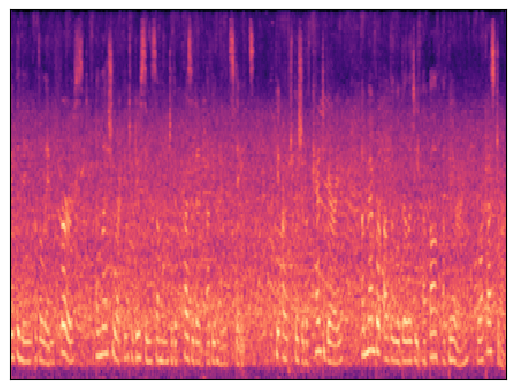

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[0], TRAIN_MAT_PATH)

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac'):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, n_mels=40, hop_length=221)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(S.shape, SP.shape, sample_rate)
    librosa.display.specshow(SP)

(40, 998) (40, 998) 22050


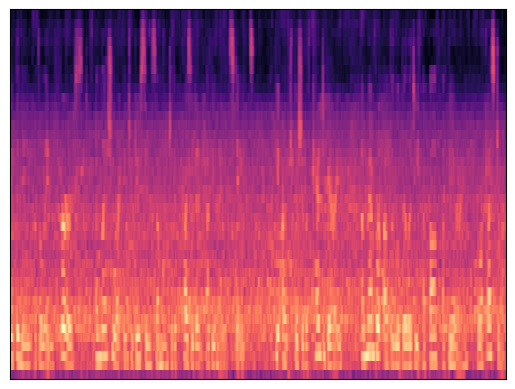

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[0], TRAIN_MAT_PATH)

In [ ]:
def spectrogram_mat(address_prefix, file, save_prefix, format='flac', n_fft=2048, hop_length= 512, n_mels=128):
    clip, sample_rate = librosa.load(address_prefix+file[:-3]+format, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    SP = librosa.power_to_db(S, ref=np.max)
    #np.save(save_prefix+file, SP)
    print(f'S.shape:{S.shape}, SP.shape:{SP.shape}, sample_rate:{sample_rate}, n_fft:{n_fft}, hop_lenght:{hop_length}, n_mels:{n_mels}')
    librosa.display.specshow(SP)

Checking

S.shape:(128, 216), SP.shape:(128, 216), sample_rate:22050, n_fft:2048, hop_lenght:1024, n_mels:128


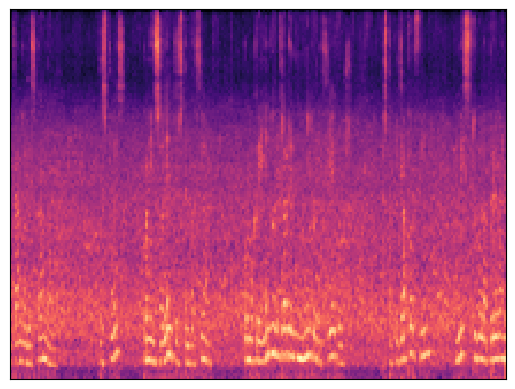

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 1024, n_mels=128)

S.shape:(128, 431), SP.shape:(128, 431), sample_rate:22050, n_fft:2048, hop_lenght:512, n_mels:128


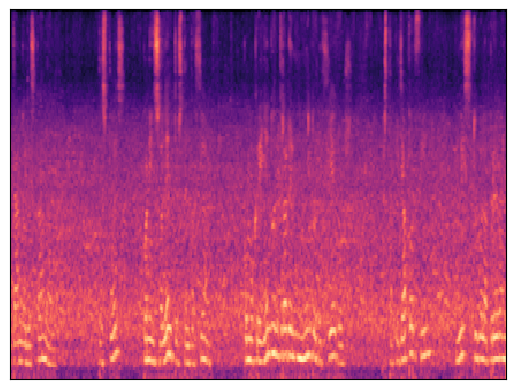

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=128)

S.shape:(128, 862), SP.shape:(128, 862), sample_rate:22050, n_fft:2048, hop_lenght:256, n_mels:128


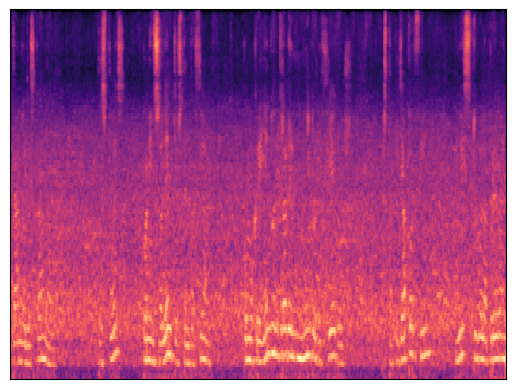

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 256, n_mels=128)

S.shape:(256, 431), SP.shape:(256, 431), sample_rate:22050, n_fft:2048, hop_lenght:512, n_mels:256


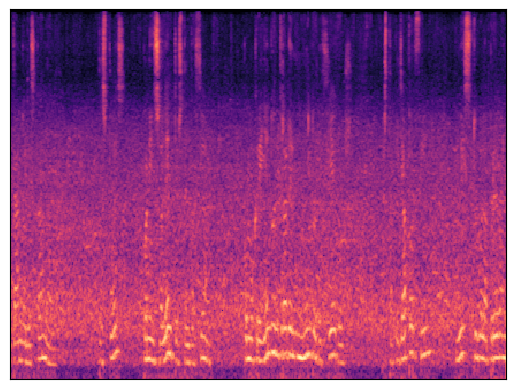

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=256)

S.shape:(128, 1723), SP.shape:(128, 1723), sample_rate:22050, n_fft:2048, hop_lenght:128, n_mels:128


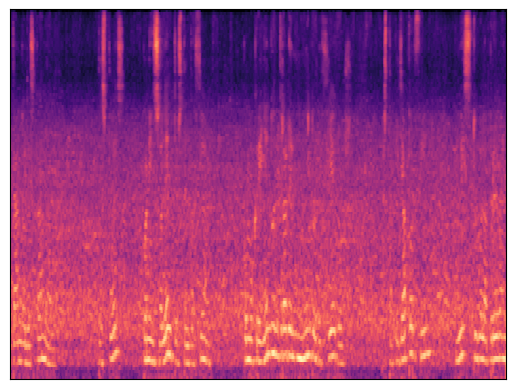

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 128, n_mels=128)

S.shape:(80, 431), SP.shape:(80, 431), sample_rate:22050, n_fft:2048, hop_lenght:512, n_mels:80


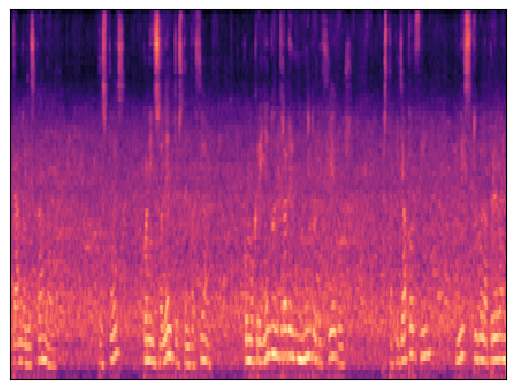

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=80)

S.shape:(64, 431), SP.shape:(64, 431), sample_rate:22050, n_fft:2048, hop_lenght:512, n_mels:64


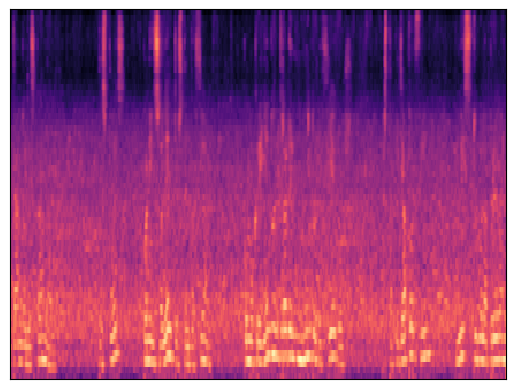

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=64)

S.shape:(40, 431), SP.shape:(40, 431), sample_rate:22050, n_fft:2048, hop_lenght:512, n_mels:40


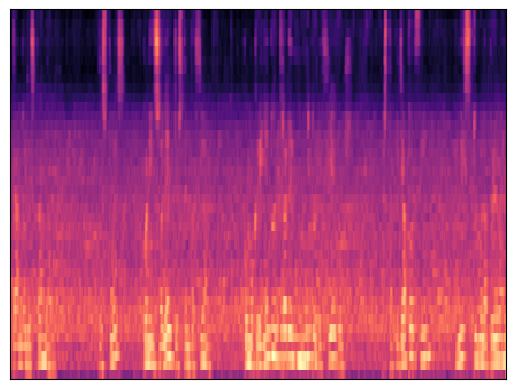

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=40)

S.shape:(40, 431), SP.shape:(40, 431), sample_rate:22050, n_fft:2048, hop_lenght:512, n_mels:40


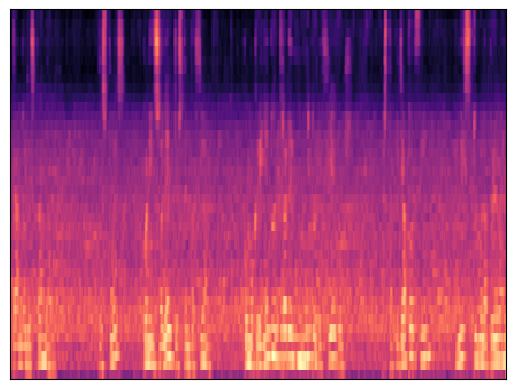

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=40)

S.shape:(40, 862), SP.shape:(40, 862), sample_rate:22050, n_fft:2048, hop_lenght:256, n_mels:40


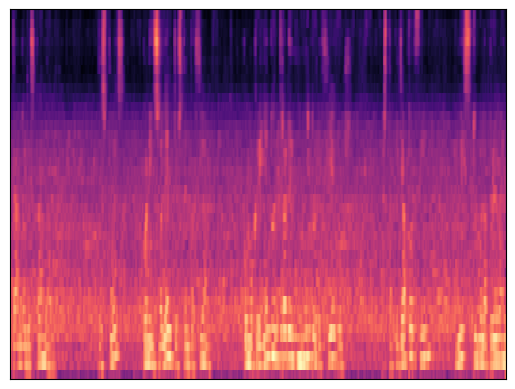

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 256, n_mels=40)

S.shape:(40, 431), SP.shape:(40, 431), sample_rate:22050, n_fft:1024, hop_lenght:512, n_mels:40


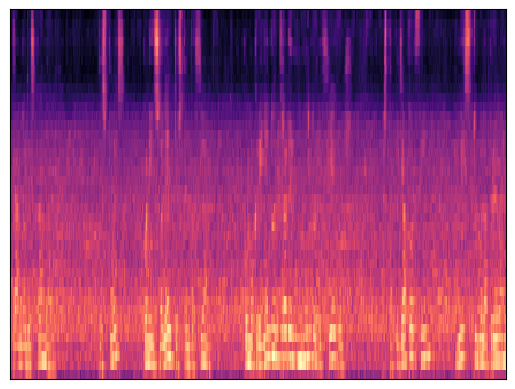

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=1024, hop_length= 512, n_mels=40)

S.shape:(40, 431), SP.shape:(40, 431), sample_rate:22050, n_fft:512, hop_lenght:512, n_mels:40


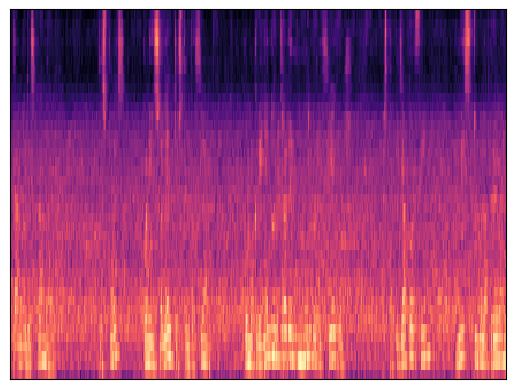

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=512, hop_length= 512, n_mels=40)

S.shape:(128, 431), SP.shape:(128, 431), sample_rate:22050, n_fft:1024, hop_lenght:512, n_mels:128


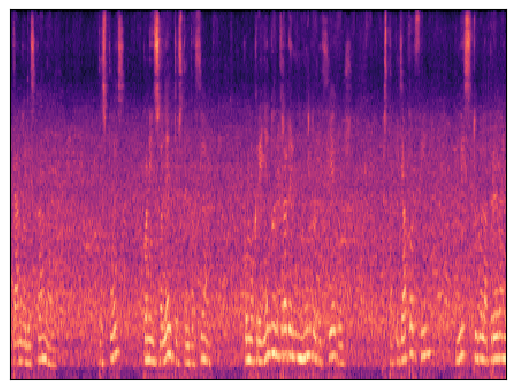

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=1024, hop_length= 512, n_mels=128)

S.shape:(128, 431), SP.shape:(128, 431), sample_rate:22050, n_fft:512, hop_lenght:512, n_mels:128


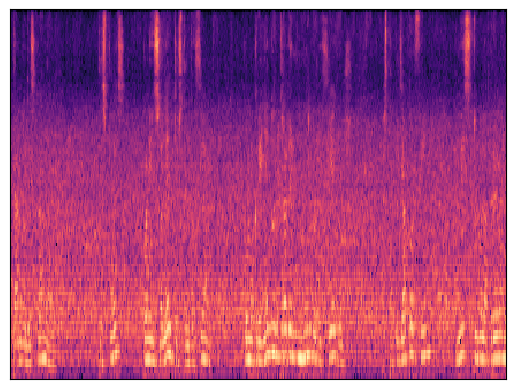

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=512, hop_length= 512, n_mels=128)

S.shape:(128, 431), SP.shape:(128, 431), sample_rate:22050, n_fft:256, hop_lenght:512, n_mels:128


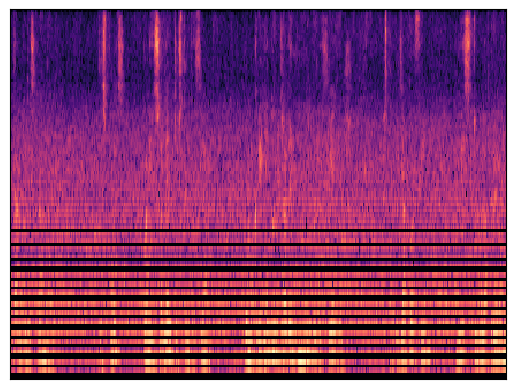

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=256, hop_length= 512, n_mels=128)

S.shape:(40, 862), SP.shape:(40, 862), sample_rate:22050, n_fft:2048, hop_lenght:256, n_mels:40


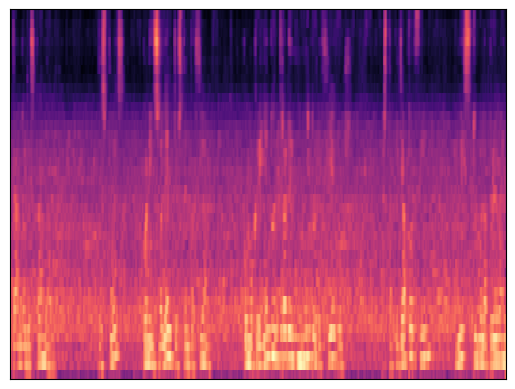

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 256, n_mels=40)

In [ ]:
spectrogram_mat(TRAIN_VOICE_PATH, traindf['ID'].iloc[1], TRAIN_MAT_PATH, n_fft=2048, hop_length= 512, n_mels=128)

In [ ]:
  def show_spectrogram_mat(filename, file, is_train=True):
    plt.interactive(False)
    ###clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure()######################### (figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ################ax.axes.get_xaxis().set_visible(False)
    ################ax.axes.get_yaxis().set_visible(False)
    ################ax.set_frame_on(False)
    ###S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    ###SP = librosa.power_to_db(S, ref=np.max)
    #S = librosa.feature.mfcc(y=clip, sr=sample_rate)
    S= np.load(filename)
    #librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    librosa.display.specshow(S)
    ######################prefix= TRAIN_IMG_PATH
    ######################if not is_train:
    ######################    prefix= TEST_IMG_PATH
    ######################name  = prefix + file[:-4] + ".jpg"
    #name2  = prefix + file[:-4] + "2.jpg"
    #np.save(name, S)
    #np.save(name2, SP)
    ####################plt.savefig(name, dpi=400, bbox_inches='tight',pad_inches=0)
    ####################plt.close()
    ####################fig.clf()
    ####################plt.close(fig)
    ####################plt.close('all')
    #del filename,name,clip,sample_rate,fig,ax,S

In [ ]:
%%time
format_len = len('flac')
#np.vectorize(spectrogram_mat)(TRAIN_VOICE_PATH, traindf['ID'], TRAIN_MAT_PATH)
traindf

CPU times: user 52min 56s, sys: 39min 34s, total: 1h 32min 30s
Wall time: 57min 50s


,file,ID,lang
0,/content/voice/train/train/es_m_f16e9da2ba7126...,es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment...,es
1,/content/voice/train/train/de_m_3aa01c55ba7ca8...,de_m_3aa01c55ba7ca85cad2977c848eb826f.fragment...,de
2,/content/voice/train/train/es_f_53b555eab2b3ba...,es_f_53b555eab2b3baada380f7d3ede20b20.fragment...,es
3,/content/voice/train/train/de_m_4d099776261f22...,de_m_4d099776261f2267d3148a7e7e766d14.fragment...,de
4,/content/voice/train/train/en_m_65733942d40b24...,en_m_65733942d40b2431cf22fe21495693f7.fragment...,en
...,...,...,...
73075,/content/voice/train/train/en_m_d630900a88e268...,en_m_d630900a88e2681c9d5d1026d7025d67.fragment...,en
73076,/content/voice/train/train/en_f_fff98d05640df2...,en_f_fff98d05640df27726dcd6183642ffaa.fragment...,en
73077,/content/voice/train/train/es_f_db16e07d9bfc39...,es_f_db16e07d9bfc39deb1792ec84d9e61fe.fragment...,es
73078,/content/voice/train/train/de_m_ce41a51416f32b...,de_m_ce41a51416f32ba7bb772887de8e0ebf.fragment...,de


In [ ]:
%%time
format_len = len('flac')
np.vectorize(spectrogram_mat)(TEST_VOICE_PATH, testdf['ID'], TEST_MAT_PATH)
testdf

CPU times: user 22.5 s, sys: 16.3 s, total: 38.8 s
Wall time: 25.2 s


,file,ID,lang
0,/content/voice/test/test/es_m_08111ce8d6a7ebc6...,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...,es
1,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
2,/content/voice/test/test/es_f_50298ab71aaba850...,es_f_50298ab71aaba8508ebeef49d853df11.fragment...,es
3,/content/voice/test/test/es_m_08111ce8d6a7ebc6...,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...,es
4,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de
...,...,...,...
535,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
536,/content/voice/test/test/en_m_b74b2bf2af570393...,en_m_b74b2bf2af570393cae91f4ed89cece7.fragment...,en
537,/content/voice/test/test/de_m_923551d571cc4373...,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de
538,/content/voice/test/test/en_f_67a0cba10d171b24...,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,en
